<a href="https://colab.research.google.com/github/ugurtegin/Nonlinear_MMF_Network/blob/main/Exp_LinReg/ImageAgePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import tensorflow as tf

from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Activation, LSTM
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import scipy.io as sio
f = sio.loadmat('/content/drive/My Drive/Research/MMF_Reservoir/AgePred/res_sq_flt2_2.mat')
inp = f['res_sq_flt']


f2 = sio.loadmat('/content/drive/My Drive/Research/MMF_Reservoir/AgePred/label.mat')
out = f2['label']


# Experimental Data

In [3]:
datasize = len(np.transpose(inp))

In [4]:
from sklearn import preprocessing

In [5]:
zbam = out.T
out = zbam/np.max(zbam)
#out = out.T

In [6]:
input_data = inp
output_data = out
#output_data = to_categorical(out)

print('input_data : ', input_data.shape, input_data.dtype)
print('output_class : ', output_data.shape, output_data.dtype)
print()

input_data :  (3000, 484) float64
output_class :  (3000, 1) float64



In [7]:
oran = 0.20
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=oran)

print('Test data : ', X_test.shape, X_test.dtype)
print('Training data : ', X_train.shape, X_train.dtype)
print()

Test data :  (600, 484) float64
Training data :  (2400, 484) float64



In [8]:
model = Sequential()
model.add(Dense(1, input_dim=datasize, activation='linear'))

In [9]:
loss='mean_squared_error' # mean_absolute_error, cosine_proximity
#loss='categorical_crossentropy'
metrics = ['mean_squared_error']  # network accuracy metric to be determined after each epoch, mean_absolute_error, cosine_proximity
#metrics = ['accuracy']  # network accuracy metric to be determined after each epoch

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt2, loss=loss, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 485       
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [10]:
#setting final parameters for the network and it begins to train
number_of_iterations = 20
batch_size = 32

#history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=number_of_iterations)
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=0, validation_data=(X_test, y_test))
#Number of iterations run: 900

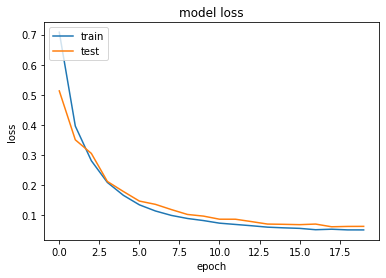

In [11]:
from google.colab import files
ls=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
ls.show()
#ls.savefig('/content/drive/My Drive/MMF_Reservoir/Stock_Intel35/loss-expset_apple.png')
#files.download('loss-1.png')

In [12]:
abit1 = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE ' + str(mean_squared_error(abit1, y_test)))
print('RMSE ' + str(np.sqrt(mean_squared_error(abit1, y_test))))

MSE 0.06162825061132793
RMSE 0.2482503788744902


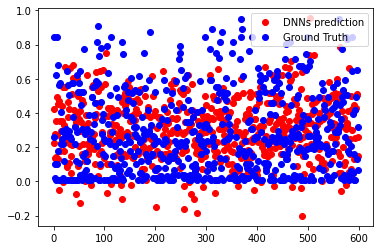

In [13]:
ls=plt.figure()
plt.plot(abit1,'ro')
plt.plot(y_test,'bo')
plt.legend(['DNNs prediction', 'Ground Truth'], loc='upper right')
ls.show()
#ls.savefig('/content/drive/My Drive/MMF_Reservoir/Stock_Intel35/loss-expset_res_apple.png')


In [14]:
abit2 = model.predict(inp)
from sklearn.metrics import mean_squared_error
print('MSE ' + str(mean_squared_error(abit2, out)))
print('RMSE ' + str(np.sqrt(mean_squared_error(abit2, out))))

MSE 0.052149490713346715
RMSE 0.22836262985293088


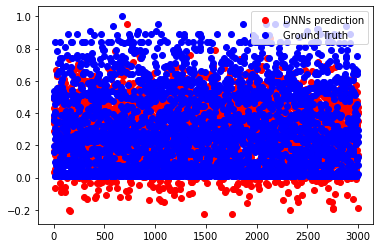

In [15]:
ls=plt.figure()
plt.plot(abit2,'ro')
plt.plot(out,'bo')
plt.legend(['DNNs prediction', 'Ground Truth'], loc='upper right')
ls.show()
#ls.savefig('/content/drive/My Drive/MMF_Reservoir/Stock_Intel35/loss-expset_res_alldata_apple.png')

In [16]:
sio.savemat('/content/drive/My Drive/Research/MMF_Reservoir/AgePred/network_res.mat', {'y':out, 'X_test':X_test, 'X_train':X_train, 'y_test':y_test, 'y_train':y_train, 'pred':abit1 , 'pred_all':abit2})